In [2]:
import math

def rg_fun(df):
#     sl = [None] * (len(df)-1)
#     for i in range(len(df)-1):
#         sl[i] = np.abs(df['y'][i+1] - df['y'][i])
#         #sl[i] = (df['y'][i+1] - df['y'][i])
    sl = np.abs(np.ediff1d(df['y']))
    return np.mean(sl)



In [1]:
from scipy.interpolate import interp1d
import pandas as pd


def intersect_fun(df1, df2):
    
    x1 = np.linspace(1, max(df1['x']), num=df1.shape[0]*10000)

    f1 = interp1d(df1['x'], df1['y'])
    f2 = interp1d(df2['x'], df2['y'])

    y1 = f1(x1)
    y2 = f2(x1)

    intersection_x = np.around(x1[np.argwhere(np.isclose(y1, y2, atol=1e-5))], 0)
    # print(intersection_x)

    intersection_y = np.around(f1(intersection_x),2)
    # print(intersection_x)

    int_df = pd.DataFrame(np.concatenate((intersection_x, intersection_y), axis=1))
    int_df.columns = ["x", "y"]

    unid = pd.DataFrame(); unid1 = pd.DataFrame()
    unid['x'] = 0; unid['y'] = 0;
    ids = np.arange(len(pd.unique(int_df['x'])))

    for i in ids:

        unid0 = int_df[int_df["x"] == pd.unique(int_df['x'])[i]]

        unid1['x'] = np.array(unid0.iloc[[0]]['x']); unid1['y'] = np.array(unid0.iloc[[0]]['y'])

        unid = pd.concat([unid, unid1], axis=0)

#     %matplotlib inline
#     plt.plot(df1['x'], df1['y'])
#     plt.plot(df2['x'], df2['y'])
#     plt.scatter(unid['x'], unid['y'], c='r', s= 50)
#     plt.show()
    
    return unid['x']

In [54]:
def rr_fun(cycdt, key, lindt):
    
    
    df1 = pd.DataFrame()
    df1['x'] = cycdt['id']; df1['y'] = cycdt['nd']
    
    g1 = np.array(intersect_fun(df1, lindt))
        
    if len(g1) == 1:
        g1 = np.append(g1, 0)
        
    if len(g1) == 0:
        g1 = np.zeros(2)
        
    if len(g1) > 2:
        g1 = np.array([np.min(g1), np.max(g1)])
    
    rg = np.array(rg_fun(df1))
    rr = np.array(math.sqrt((cycdt['nd'][0] - lindt['y'][0]) ** 2))
    
    ret1 = np.append(rg, rr)
    ret2 = np.append(ret1, g1)
        
    return ret2 
    

In [55]:
def rrg_fun(xtr_y, amn):
    dt = [None] * len(xtr_y)
    for i in range(len(xtr_y)):
        y1 = xtr_y[i]
        y2 = amn
        dt[i] = math.sqrt((y1-y2) ** 2)
    return dt

In [56]:
def pk_dif(xtrms):
    tdif = [None] * (len(xtrms)-1)
    for i in range(len(xtrms)-1):
        tdif[i] = xtrms[i+1] - xtrms[i]
    return tdif

In [3]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema

def resilience_calc_func(ts5):
    
    fitt = ts5
    
    
    maxs = np.array(argrelextrema(np.array(fitt), np.greater))
    mins = np.array(argrelextrema(np.array(fitt), np.less))
    pks = np.concatenate((maxs.ravel(), mins.ravel()))
    pks1 = np.sort(pks)
    
#     eqq1 = ts5[pks]
#     eqq = np.mean([np.max(eqq1), np.min(eqq1)])
    
#     %matplotlib notebook
#     plt.plot(fitt)
#     plt.axvline(x=pks1[0], color='blue')
#     plt.axhline(y=eqq, color='red')
#     plt.show()

    cyc_num = np.floor(len(pks1)/2)
    rem = len(pks1)%2
    
    if maxs[0][0] < mins[0][0]:
        ky = 1
    else:
        ky = -1
    res = np.empty((int(cyc_num), 4))
    res[:] = np.nan
    
#     lindt1 = pd.DataFrame({'x': range(1,len(ts5)), 'y': eqq})
    
    lindt1 = pd.DataFrame({'x': range(1,len(ts5)), 'y': np.mean(ts5)})
    
#     print(pks1); print(len(ts5));
#     print(np.shape(pks1))
    
    if ky == 1:
        num_cyc = int(cyc_num)
        if rem == 0:
            pks2 = np.append(pks1, len(ts5))
        else:
            pks2 = pks1
        for i in range(0, num_cyc):
            cyc = pks2[[(2*i),(2*(i+1))]]
            cyci = pd.DataFrame({'nd': fitt[cyc[0]:cyc[1]],
                                 't': range(cyc[0], cyc[1]),
                                 'id': range(1, len(range(cyc[0], cyc[1]))+1)})
            cyci1 = cyci[cyci['nd'] != np.nan]
#             print(cyci1)
            rr_fn1 = rr_fun(cyci1, ky, lindt1)
            res[i] = np.append(rr_fn1[0:3], rr_fn1[len(rr_fn1)-1])
#             print(i)
            
    
    if ky == -1:
        num_cyc = int(cyc_num)
        if rem == 0:
            pks2 = np.append(pks1, len(ts5))
        else:
            pks2 = pks1
        for i in range(0, num_cyc):
            cyc = pks2[[(2*i),(2*(i+1))]]
            cyci = pd.DataFrame({'nd': fitt[cyc[0]:cyc[1]],
                                 't': range(cyc[0], cyc[1]),
                                 'id': range(1, len(range(cyc[0], cyc[1]))+1)})
            cyci1 = cyci[cyci['nd'] != np.nan]
            rr_fn1 = rr_fun(cyci1, ky, lindt1)
            res[i] = np.append(rr_fn1[0:3], rr_fn1[len(rr_fn1)-1])
#             print(i)
            
#     print(res)
    


    if maxs[0][0] < mins[0][0]:
        rr = rrg_fun(fitt[maxs[0]], np.mean(ts5))
#         rr = rrg_fun(fitt[maxs[0]], eqq)
        rtp = np.ediff1d(maxs[0])
    else:
        rr = rrg_fun(fitt[mins[0]], np.mean(ts5))
#         rr = rrg_fun(fitt[maxs[0]], eqq)
        rtp = np.ediff1d(mins[0])
#         print(mins[0])

    tim = np.concatenate((res[:,2], res[:,3]), axis = 0)
    tim[tim == 0] = 'nan'
    print(tim)
    t1 = np.sort(tim[~np.isnan(tim)])
    print(t1)
    t2 = np.full(len(t1)-1, np.nan)
    
    for j in range(0, len(t1)-1):
        t2[j] = t1[j+1]-t1[j]

    rg1 = (res[:,0])
    rg1 = rg1[rg1 != 0]
    
    mn_rg = np.mean(rg1) #RG : rate of return
    mn_rr = np.mean(rr) #RR : distance b/w steady state and equllibrium
    mn_rtp = np.mean(rtp)
    
    rtn = 1 - (len(t1)/len(tim))
    sd_rg = np.std(rg1)
    sd_rr = np.std(rr)
    sd_rtp = np.std(rtp)*np.sqrt(cyc_num)
    
    return (mn_rg, mn_rr, mn_rtp, rtn, sd_rg, sd_rr, sd_rtp)
#     return (1/mn_rg, mn_rr, mn_rtp, rtn, 1/sd_rg, sd_rr, sd_rtp)

In [ ]:
# import random as rn
# import pylab as pl
# import matplotlib.pyplot as plt
# import numpy as np

# tend = 100
# t_step = 0.01

# %matplotlib inline
# def varying_extForce(N, Ts, ampl, mg):
#     x0=pl.arange(0,N,Ts)
#     sigs = np.zeros([10, len(x0)])

#     phi = pl.linspace(0.001, 0.3, 100)
#     amp = pl.linspace(2, 5, 100)

#     for i in np.arange(10):

#         amp1 = amp[rn.randint(0, 99)]
#         phi1 = phi[rn.randint(0, 99)]

#         y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
#         sigs[i,:] = y1
        
#     sigs1 = ampl*np.apply_along_axis(np.mean, 0, sigs)
#     plt.plot(sigs1)
#     return(sigs1)

# y00 = varying_extForce(tend, t_step, 0.75, 4)
# y01 = varying_extForce(tend, t_step, 0.75, 3)

[ 229  625  915 1257 1605 1994 2408 3114 3479 3911 4301 4566 5037 5325
 5793 6434 6907 7290 7479 7844 8259 8684 9128 9514]
10000
(24,)
0
1
2
3
4
5
6
7
8
9
10
11
[[4.60133386e-03 2.09594392e+00 2.98000000e+02 5.15000000e+02]
 [2.81243422e-03 4.73890106e-01 1.68000000e+02 5.20000000e+02]
 [2.36021902e-03 4.63383567e-01 1.70000000e+02 6.74000000e+02]
 [8.92515578e-04 1.28879386e-01 2.45000000e+02 9.07000000e+02]
 [2.47419453e-03 2.61503138e-01 1.41000000e+02 0.00000000e+00]
 [1.59813169e-03 8.75388833e-02 4.61000000e+02 0.00000000e+00]
 [5.24733955e-04 5.51509487e-01 0.00000000e+00 0.00000000e+00]
 [4.30716314e-03 6.20263354e-01 3.06000000e+02 9.23000000e+02]
 [2.10939678e-03 8.79801163e-01 2.65000000e+02 0.00000000e+00]
 [3.51990726e-03 4.54306556e-02 5.83000000e+02 0.00000000e+00]
 [3.79451790e-03 8.91089090e-01 1.95000000e+02 7.26000000e+02]
 [1.57486569e-03 2.36076375e-01 2.42000000e+02 5.26000000e+02]]


(392.5492371413505,
 0.5612757604866768,
 809.0,
 0.25,
 799.0263478396087,
 0.5369158353650454,
 153.71520300986379)

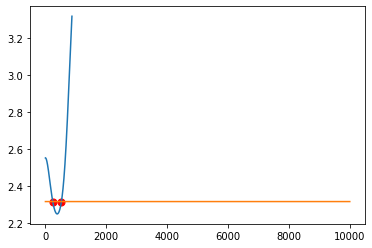

In [61]:
# rtts = resilience_calc_func(y01)
# rtts

<IPython.core.display.Javascript object>


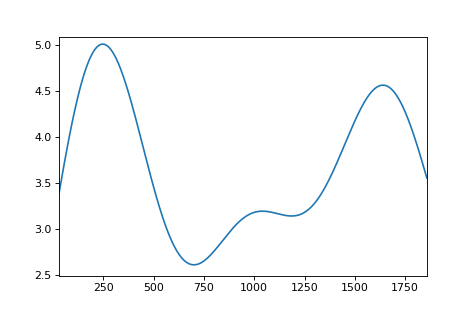

In [13]:
# %matplotlib notebook
# plt.plot(y00)

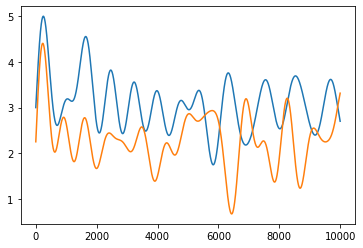

In [8]:
# import random as rn
# import pylab as pl
# import matplotlib.pyplot as plt
# import numpy as np

# tend = 100
# t_step = 0.01

# %matplotlib inline
# def varying_extForce(N, Ts, ampl, mg):
#     x0=pl.arange(0,N,Ts)
#     sigs = np.zeros([10, len(x0)])

#     phi = pl.linspace(0.001, 0.3, 100)
#     amp = pl.linspace(2, 5, 100)

#     for i in np.arange(10):

#         amp1 = amp[rn.randint(0, 99)]
#         phi1 = phi[rn.randint(0, 99)]

#         y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
#         sigs[i,:] = y1
        
#     sigs1 = ampl*np.apply_along_axis(np.mean, 0, sigs)
#     plt.plot(sigs1)
#     return(sigs1)

# y00 = varying_extForce(tend, t_step, 0.75, 4)
# y01 = varying_extForce(tend, t_step, 0.75, 3)

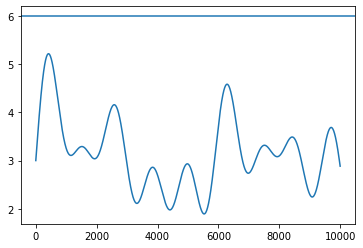

In [446]:
# %matplotlib inline

# plt.plot(y00)
# plt.axhline(6)

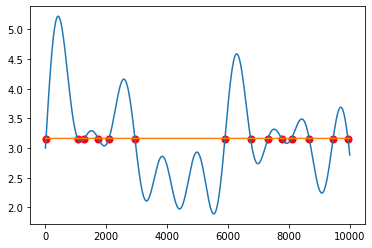

In [494]:
# lin_df = pd.DataFrame({'y': np.repeat(np.mean(y00), len(y00)), 'x': pl.arange(0,len(y00),1)})
# cur_df = pd.DataFrame({'y': y00, 'x': pl.arange(0,len(y00),1)})

# res = intersect_fun( cur_df, lin_df)

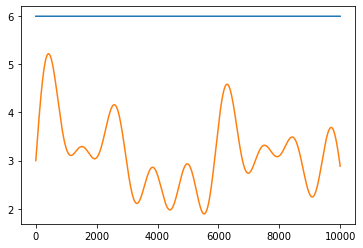

In [453]:
# plt.plot(lin_df['x'], lin_df['y'])
# plt.plot(cur_df['x'], cur_df['y'])

0
1
2
3
4
5
6
7


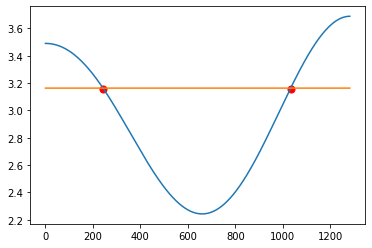

In [509]:
# ts5 = y00
    
# %matplotlib notebook
# maxs = np.array(argrelextrema(np.array(ts5), np.greater))
# mins = np.array(argrelextrema(np.array(ts5), np.less))
# pks = np.concatenate((maxs.ravel(), mins.ravel()))
# pks1 = np.sort(pks)
# # plt.plot(ts5)
# # plt.axvline(x=pks1[0], color='blue')
# # plt.axhline(y=np.mean(ts5), color='red')

# cyc_num = np.floor(len(pks1)/2)
# rem = len(pks1)%2

# if maxs[0][0] < mins[0][0]:
#     ky = 1
# else:
#     ky = -1
# res = np.empty((int(cyc_num), 4))
# res[:] = np.nan
# #lindt1 = pd.DataFrame({'x': range(1,len(ts5)), 'y': np.mean(ts5)})

# num_cyc = int(cyc_num)
# if rem == 0:
#     pks2 = np.append((pks1, len(ts5)-1))
# else:
#     pks2 = pks1
# for i in range(0, num_cyc):
#     cyc = pks2[[(2*i),(2*(i+1))]]
#     cyci = pd.DataFrame({'nd': fitt[cyc[0]:cyc[1]],
#                          't': range(cyc[0], cyc[1]),
#                          'id': range(1, len(range(cyc[0], cyc[1]))+1)})
#     cyci1 = cyci[cyci['nd'] != np.nan]
#     lindt1 = pd.DataFrame({'x': np.arange(1, cyci1.shape[0]+1), 'y': np.mean(ts5)})
#     res[i] = rr_fun(cyci1, ky, lindt1)
#     print(i)

In [9]:
# from scipy.interpolate import interp1d
# import pandas as pd


# # Assume data frames df1 and df2 have columns 'x' and 'y'
# df1 = pd.DataFrame(); df2 = pd.DataFrame();
# df1['x'] = x0; df2['x'] = x0;
# df1['y'] = y00; df2['y'] = y01;
# df1.shape[0]*100


# # Find the x-coordinates where the y-values of the two interpolation functions are equal
# x = np.linspace(0, max(df1['x']), num=df1.shape[0]*100)

# # Create interpolation functions for both data frames
# f1 = interp1d(df1['x'], df1['y'])
# f2 = interp1d(df2['x'], df2['y'])

# y1 = f1(x)
# y2 = f2(x)
# intersection_x = np.around(x[np.argwhere(np.isclose(y1, y2, atol=1e-2))], 2)
# #x_id = np.unique(intersection_x)
# intersection_y = np.around(f1(intersection_x),2)

# int_df = pd.DataFrame(np.concatenate((intersection_x, intersection_y), axis=1))
# int_df.columns = ["x", "y"]

# unid = pd.DataFrame(); unid1 = pd.DataFrame()
# unid['x'] = 0; unid['y'] = 0;
# ids = np.arange(len(pd.unique(int_df['y'])))

# for i in ids:
    
#     unid0 = int_df[int_df["y"] == pd.unique(int_df['y'])[i]]
    
#     unid1['x'] = np.array(unid0.iloc[[0]]['x']); unid1['y'] = np.array(unid0.iloc[[0]]['y'])

#     unid = pd.concat([unid, unid1], axis=0)
    
# %matplotlib notebook
# plt.plot(x0, y00)
# plt.plot(x0, y01)
# plt.scatter(unid['x'], unid['y'], c='r', s= 50)



1000000

<IPython.core.display.Javascript object>


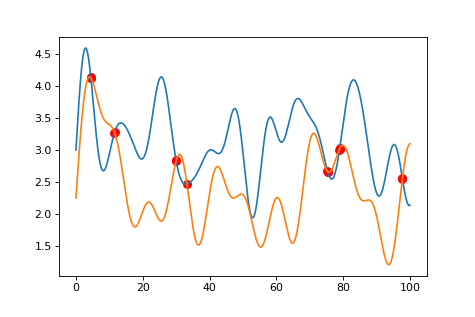

In [117]:
# from scipy.interpolate import interp1d
# import pandas as pd


# # Assume data frames df1 and df2 have columns 'x' and 'y'
# df1 = pd.DataFrame(); df2 = pd.DataFrame();
# df1['x'] = x0; df2['x'] = x0;
# df1['y'] = y00; df2['y'] = y01;
# df1.shape[0]*100


# # Find the x-coordinates where the y-values of the two interpolation functions are equal
# x = np.linspace(0, max(df1['x']), num=df1.shape[0]*100)

# # Create interpolation functions for both data frames
# f1 = interp1d(df1['x'], df1['y'])
# f2 = interp1d(df2['x'], df2['y'])

# y1 = f1(x)
# y2 = f2(x)
# intersection_x = np.around(x[np.argwhere(np.isclose(y1, y2, atol=1e-2))], 2)
# #x_id = np.unique(intersection_x)
# intersection_y = np.around(f1(intersection_x),2)

# int_df = pd.DataFrame(np.concatenate((intersection_x, intersection_y), axis=1))
# int_df.columns = ["x", "y"]

# unid = pd.DataFrame(); unid1 = pd.DataFrame()
# unid['x'] = 0; unid['y'] = 0;
# ids = np.arange(len(pd.unique(int_df['y'])))

# for i in ids:
    
#     unid0 = int_df[int_df["y"] == pd.unique(int_df['y'])[i]]
    
#     unid1['x'] = np.array(unid0.iloc[[0]]['x']); unid1['y'] = np.array(unid0.iloc[[0]]['y'])

#     unid = pd.concat([unid, unid1], axis=0)
    
# %matplotlib notebook
# plt.plot(x0, y00)
# plt.plot(x0, y01)
# plt.scatter(unid['x'], unid['y'], c='r', s= 50)

